In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 

%config InlineBackend.figure_format = 'retina'

In [2]:
df_cars = pd.read_csv("cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


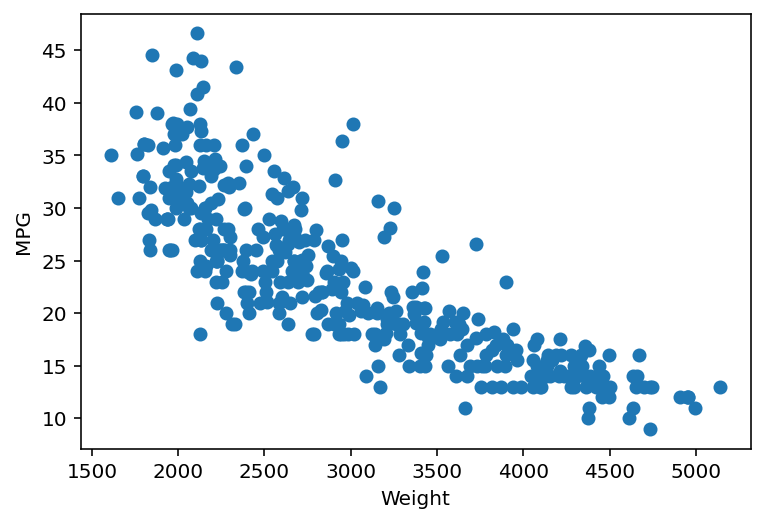

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_cars['WGT'], df_cars['MPG'])

ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

In [4]:
def best_fit_line(x_values, y_values):
    """Returns slope and y-intercept of the best fit line of the values"""

    mean = lambda l: sum(l)/len(l)
    multiply = lambda l1, l2: [a*b for a, b in zip(l1, l2)]

    m = ( (mean(x_values)*mean(y_values) - mean(multiply(x_values, y_values))) / 
          (mean(x_values)**2             - mean(multiply(x_values, x_values))) )

    b = mean(y_values) - m*mean(x_values)

    return m, b

In [5]:
x = df_cars['WGT']
y= df_cars['MPG']
m, b = best_fit_line(x,y)
print(f"regression line: y = {round(m,2)}x + {round(b,2)}")

regression line: y = -0.01x + 46.22


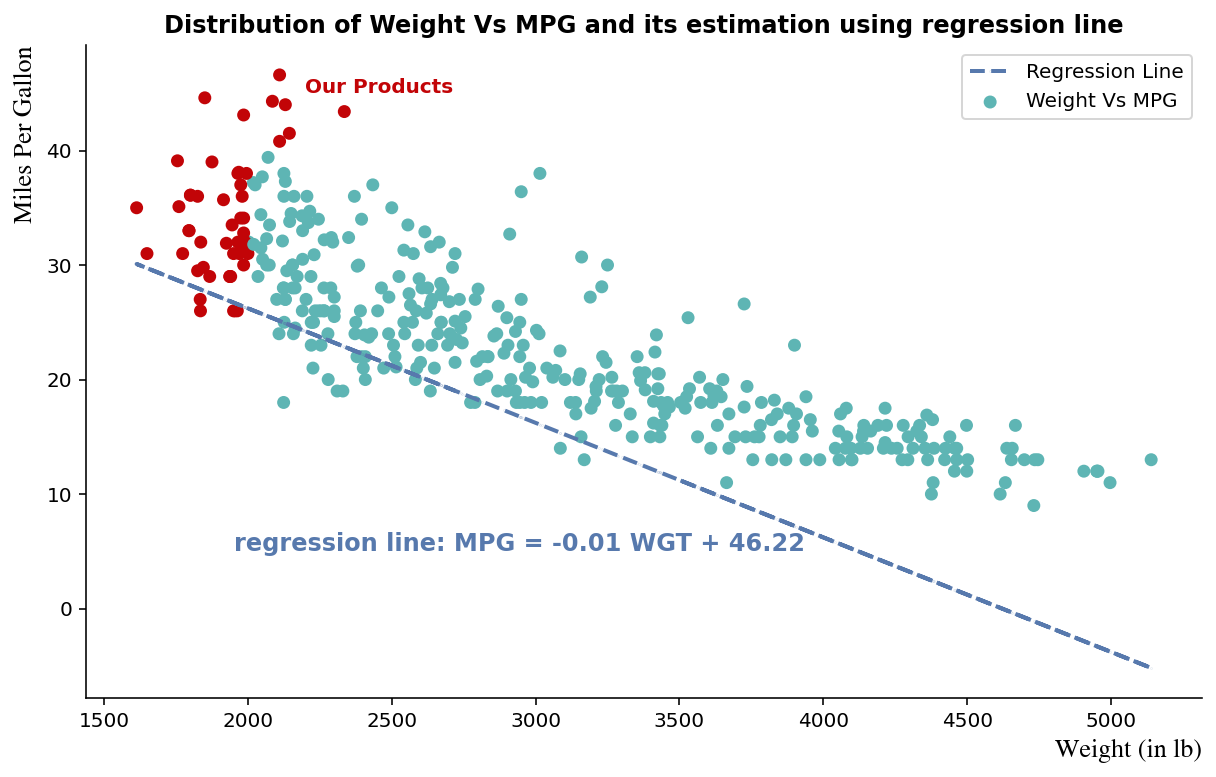

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
col = np.where((df_cars['MPG']>=40) | (df_cars['WGT'] <=2000), '#C20407', '#5EB5B4')
ax.scatter(x, y, s=30, color=col, label="Weight Vs MPG")
ax.plot(x, -0.01 * x + 46.22, color ='#5779AD', linewidth=2, linestyle='--',marker='o',markersize=0.05, label="Regression Line")
ax.annotate('regression line: MPG = -0.01 WGT + 46.22', 
             (1950, 5),
             c='#5779AD',
             size=12, weight='bold') #add text
ax.annotate('Our Products',(2200,45),c='#C20407', size = 10, weight='bold')


#Hide frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc="upper right")
ax.set_xlabel("Weight (in lb)",loc="right", fontsize=13, fontname="Times",weight="bold")
ax.set_ylabel("Miles Per Gallon",loc="top", fontsize=13, fontname="Times",weight="bold")
ax.set_title("Distribution of Weight Vs MPG and its estimation using regression line",weight="bold")
plt.show()

(II) 2

In [7]:
employee_feedback=dict()
employee_feedback['Peers'] = [85, 91]
employee_feedback['Culture'] = [80, 96]
employee_feedback['Work environment'] = [76, 75]
employee_feedback['Leadership'] = [59, 62]
employee_feedback['Career development'] = [49, 33]
employee_feedback['Rewards & recognition'] = [41, 45]
employee_feedback['Perf management'] = [33, 42]

employee_feedback['Work environment']

[76, 75]

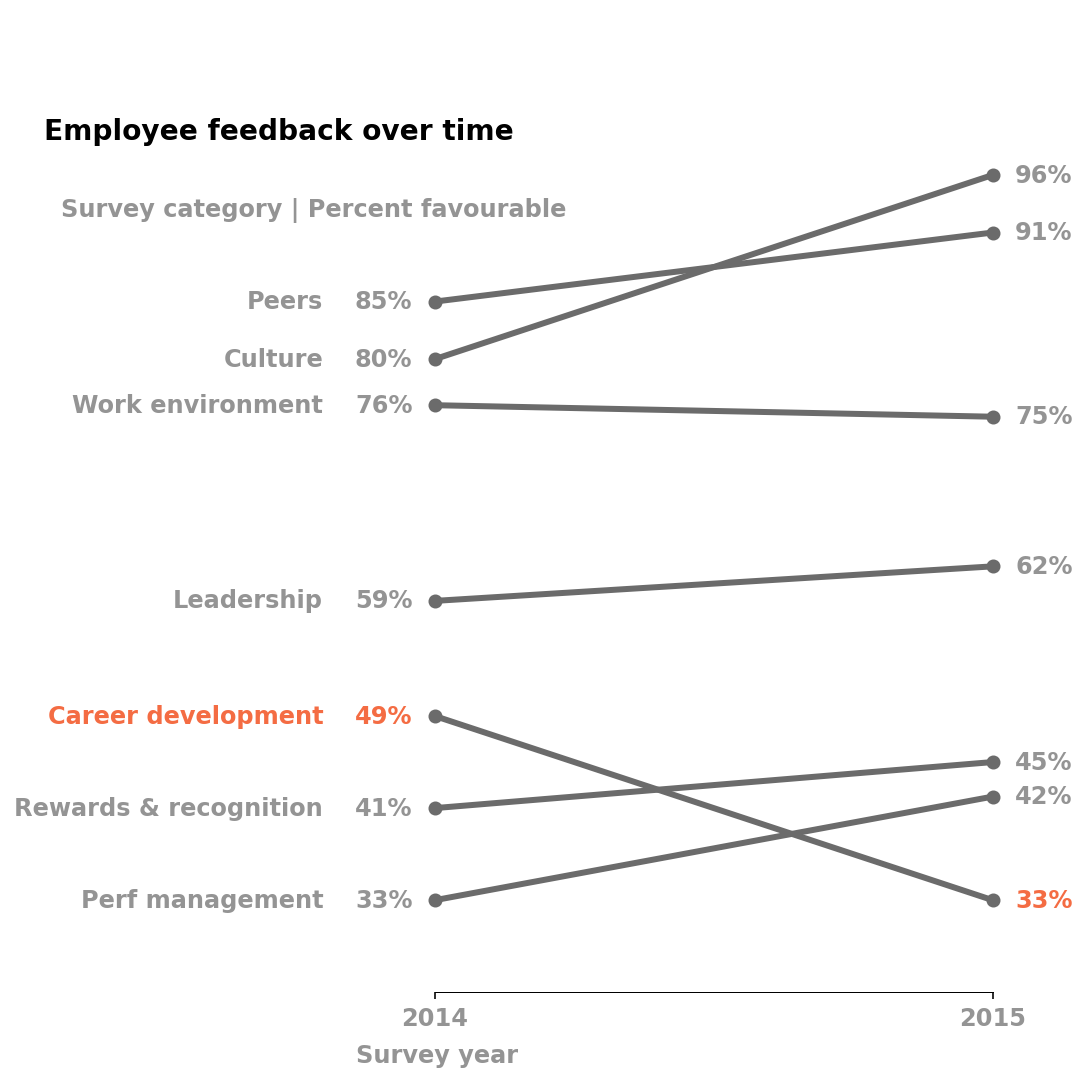

In [8]:
fig, ax = plt.subplots(figsize=(6,9))

# Let's use 0 as the left-hand side and 1 as the right-hand side

ax.set_xlim(0-.1,1+.1)
ax.set_ylim(25,110) #match ylim with the range of values
s = "Survey Category | Percent Favourable"
# Draw lines and text associated with employee_feedback
for key in employee_feedback.keys():
    a,b = employee_feedback[key]
    color = '#949494'
    if key=='Career development':
        color = '#F46C43' #highlight employee_feedback from Shan using a bright color
    ax.plot([0,1], [a,b], 'o-', lw=3, c="#6b6b6b") #line plot with x=[0,1] y=[a,b] for each key
    ax.text(0-.04, a, f"{a:.0f}%", color=color,
            horizontalalignment='right', verticalalignment='center', size=12,weight="bold") #print value of a
    ax.text(1+.04, b, f"{b:.0f}%", color=color,
            horizontalalignment='left', verticalalignment='center', size=12,weight="bold")  #print value of b
    ax.text(0-.20, a, key, color=color,
            horizontalalignment='right', verticalalignment='center', size=12,weight="bold") #print names
ax.text(0+0.25, 93,'Survey category | Percent favourable ', color=color,
            horizontalalignment='right', verticalalignment='center', size=12,weight="bold")
ax.text(0+0.15, 19.5,'Survey year', color=color,
            horizontalalignment='right', verticalalignment='center', size=12,weight="bold")

# Make the axes look right
ax.set_title("Employee feedback over time", size=14, loc = "left", y =0.9, x=-0.5, pad=-14,weight="bold")
ax.spines['bottom'].set_bounds(0, 1)
ax.set_xticks([0,1])
ax.set_xticklabels(['2014','2015'], size=12, color="#949494",weight="bold")
ax.set_yticks([])

# Only show the bottom axis
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
plt.show()

(3)

In [9]:
df_covid = pd.read_csv('sf_covid.csv')
df_covid['Date'] = pd.to_datetime(df_covid.Date)
df = df_covid.drop(df_covid.columns[[0]],axis=1)

In [10]:
df

,Date,Count
0,2020-03-03,2
1,2020-03-05,6
2,2020-03-07,5
3,2020-03-08,1
4,2020-03-10,6
...,...,...
346,2021-02-15,74
347,2021-02-16,80
348,2021-02-17,69
349,2021-02-18,76


In [11]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,Count,month
0,2020-03-03,2,3
1,2020-03-05,6,3
2,2020-03-07,5,3
3,2020-03-08,1,3
4,2020-03-10,6,3


In [12]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Count,month,year
0,2020-03-03,2,3,2020
1,2020-03-05,6,3,2020
2,2020-03-07,5,3,2020
3,2020-03-08,1,3,2020
4,2020-03-10,6,3,2020


In [13]:
import calendar
df['month_abr'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
df

,Date,Count,month,year,month_abr
0,2020-03-03,2,3,2020,Mar
1,2020-03-05,6,3,2020,Mar
2,2020-03-07,5,3,2020,Mar
3,2020-03-08,1,3,2020,Mar
4,2020-03-10,6,3,2020,Mar
...,...,...,...,...,...
346,2021-02-15,74,2,2021,Feb
347,2021-02-16,80,2,2021,Feb
348,2021-02-17,69,2,2021,Feb
349,2021-02-18,76,2,2021,Feb


In [15]:
df_avg_count = df.groupby(['month_abr','year']).mean()
df_avg_count=df_avg_count.sort_values(by=['year','month'], ascending=True)
df_avg_count.reset_index(drop=False, inplace=True)

In [16]:
df_max_count = df.groupby(['month_abr','year']).max()
df_max_count=df_max_count.sort_values(by=['year','month'], ascending=True)
df_max_count.reset_index(drop=False, inplace=True)
df_max_count

,month_abr,year,Date,Count,month
0,Mar,2020,2020-03-31,55,3
1,Apr,2020,2020-04-30,76,4
2,May,2020,2020-05-31,51,5
3,Jun,2020,2020-06-30,105,6
4,Jul,2020,2020-07-31,161,7
5,Aug,2020,2020-08-31,134,8
6,Sep,2020,2020-09-30,95,9
7,Oct,2020,2020-10-31,74,10
8,Nov,2020,2020-11-30,274,11
9,Dec,2020,2020-12-31,442,12


In [17]:
df_max_count['counter'] = range(df_max_count.shape[0])
df_max_count

,month_abr,year,Date,Count,month,counter
0,Mar,2020,2020-03-31,55,3,0
1,Apr,2020,2020-04-30,76,4,1
2,May,2020,2020-05-31,51,5,2
3,Jun,2020,2020-06-30,105,6,3
4,Jul,2020,2020-07-31,161,7,4
5,Aug,2020,2020-08-31,134,8,5
6,Sep,2020,2020-09-30,95,9,6
7,Oct,2020,2020-10-31,74,10,7
8,Nov,2020,2020-11-30,274,11,8
9,Dec,2020,2020-12-31,442,12,9


In [18]:
df_min_count = df.groupby(['month_abr','year']).min()
df_min_count=df_min_count.sort_values(by=['year','month'], ascending=True)
df_min_count.reset_index(drop=False, inplace=True)
df_min_count

,month_abr,year,Date,Count,month
0,Mar,2020,2020-03-03,1,3
1,Apr,2020,2020-04-01,14,4
2,May,2020,2020-05-01,5,5
3,Jun,2020,2020-06-01,15,6
4,Jul,2020,2020-07-01,27,7
5,Aug,2020,2020-08-01,33,8
6,Sep,2020,2020-09-01,17,9
7,Oct,2020,2020-10-01,10,10
8,Nov,2020,2020-11-01,27,11
9,Dec,2020,2020-12-01,70,12


In [19]:
df_min_count['counter'] = range(df_min_count.shape[0])
df_min_count

,month_abr,year,Date,Count,month,counter
0,Mar,2020,2020-03-03,1,3,0
1,Apr,2020,2020-04-01,14,4,1
2,May,2020,2020-05-01,5,5,2
3,Jun,2020,2020-06-01,15,6,3
4,Jul,2020,2020-07-01,27,7,4
5,Aug,2020,2020-08-01,33,8,5
6,Sep,2020,2020-09-01,17,9,6
7,Oct,2020,2020-10-01,10,10,7
8,Nov,2020,2020-11-01,27,11,8
9,Dec,2020,2020-12-01,70,12,9


In [20]:
df_avg_count['counter'] = range(df_avg_count.shape[0])
df_avg_count

,month_abr,year,Count,month,counter
0,Mar,2020,22.038462,3.0,0
1,Apr,2020,39.200000,4.0,1
2,May,2020,28.354839,5.0,2
3,Jun,2020,43.833333,6.0,3
4,Jul,2020,105.225806,7.0,4
5,Aug,2020,81.709677,8.0,5
6,Sep,2020,57.633333,9.0,6
7,Oct,2020,37.161290,10.0,7
8,Nov,2020,121.700000,11.0,8
9,Dec,2020,268.516129,12.0,9


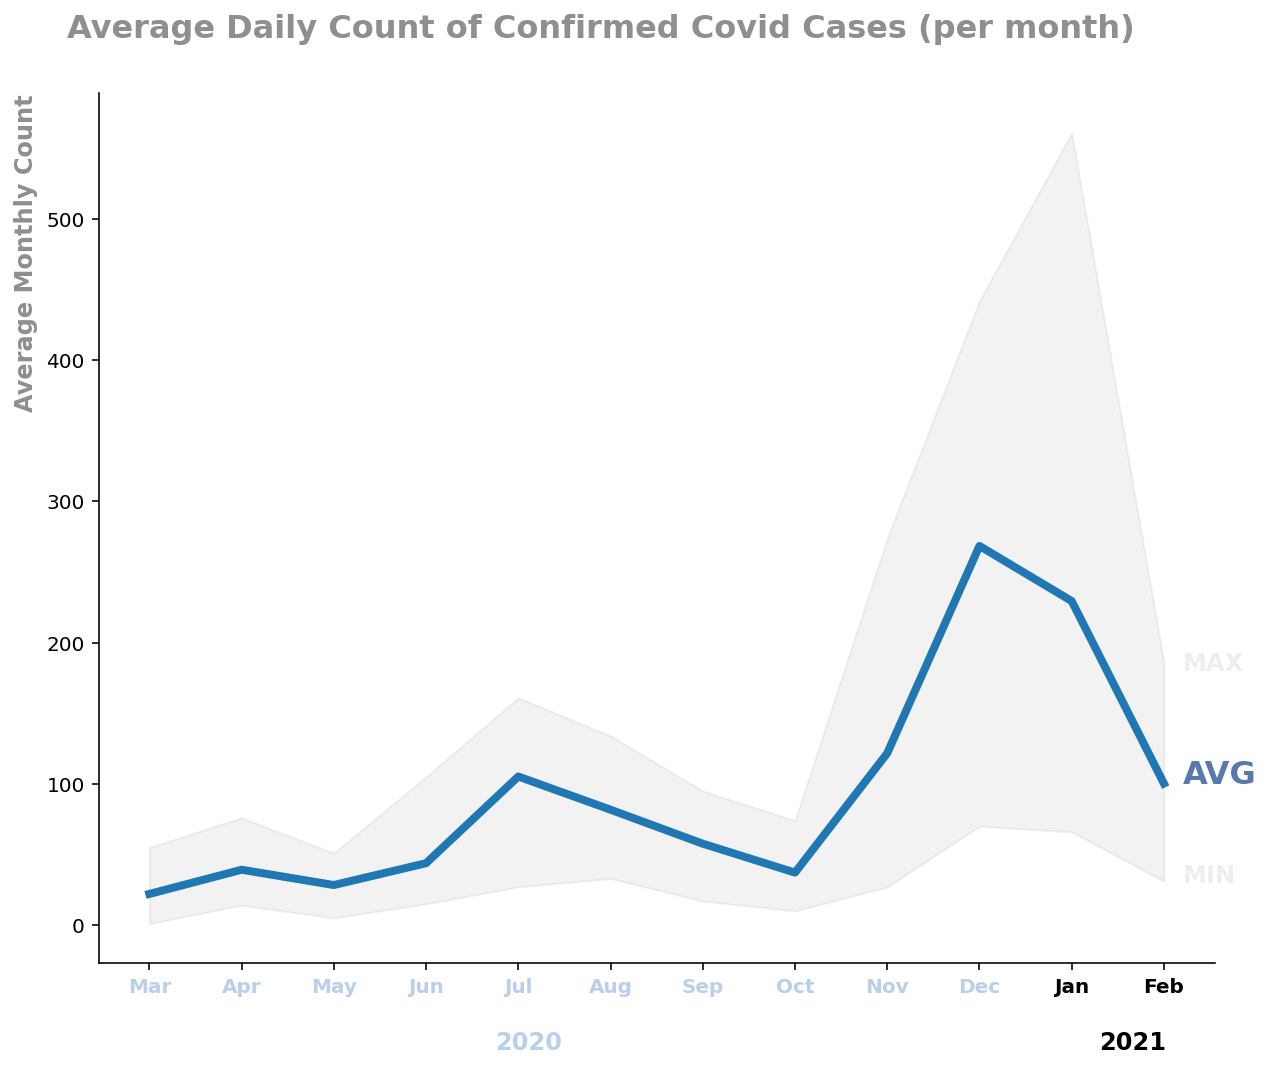

In [21]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax.plot(df_avg_count['counter'], df_avg_count['Count'],lw=4)#bar plot takes at least x and y axis as arguments
ax.plot(df_max_count['counter'],df_max_count['Count'], label = 'max', lw = 0)
ax.plot(df_min_count['counter'],df_min_count['Count'], label = 'min', lw = 0)
ax.set_xticks(range(12))
xticks_label = ax.set_xticklabels(['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec', 'Jan', 'Feb'], weight="bold")
plt.fill_between(df_avg_count['counter'], df_min_count['Count'], df_max_count['Count'],color='k',alpha=.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlabel("Passenger Count")
#ax.set_ylabel("Average trip duration (mins)")
#ax.set_xticks(df_avg_count)                     
#ax.set_xticklabels([f'{n}' for n in df_avg_count])
#ax.set_title("Passenger Count Vs Average Trip Duration",      fontsize=18, fontname="Times")
ax.annotate('MAX', 
             (11.2, 180),
             size=12,color='#eceef1', weight='bold') #add text
ax.annotate('AVG', 
             (11.2, 100),
             c='#5779AD',
             size=16, weight='bold') #add text
ax.annotate('MIN', 
             (11.2, 30),
             c='#eceef1',
             size=12, weight='bold') #add text
ax.set_ylabel("Average Monthly Count", loc ="top",size=12, weight="bold",color="#8f8f8f")
ax.set_title("Average Daily Count of Confirmed Covid Cases (per month)", weight ="bold",fontsize =16,color="#8f8f8f",x=.45, y=1.05)
x_colors = ['#bacfeb','#bacfeb','#bacfeb','#bacfeb','#bacfeb','#bacfeb','#bacfeb','#bacfeb','#bacfeb',
            '#bacfeb','black','black']
count = 0
for xtick, color in zip(xticks_label, x_colors):
    #print (xtick)
    #print (count)
    #print (color)
    if(count<=9):
        xtick.set_color(color)
    else:
        xtick.set_color(color)
    count+=1
    
plt.figtext(0.4, 0.05, "2020", fontsize=12, color="#bacfeb",weight="bold")
plt.figtext(0.82, 0.05,"2021", fontsize=12, color="black",weight="bold")
plt.show()
#need to check again

(4)

In [22]:
df_covid_deaths = pd.read_csv('united_states_excess_deaths.csv')
df_covid_deaths.head(5)

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,United States,Alabama,AL,2019-12-29,2020-01-04,7,2020,1,4903185,1082,0,1155,-73,1082,0.0,-1.488828,-0.063203
1,United States,Alabama,AL,2020-01-05,2020-01-11,7,2020,2,4903185,1127,0,1172,-45,1127,0.0,-0.917771,-0.038396
2,United States,Alabama,AL,2020-01-12,2020-01-18,7,2020,3,4903185,1039,0,1153,-114,1039,0.0,-2.325019,-0.098873
3,United States,Alabama,AL,2020-01-19,2020-01-25,7,2020,4,4903185,1056,0,1138,-82,1056,0.0,-1.672382,-0.072056
4,United States,Alabama,AL,2020-01-26,2020-02-01,7,2020,5,4903185,1026,0,1136,-110,1026,0.0,-2.243440,-0.096831


In [23]:
df_covid_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4120 non-null   object 
 1   region                    4120 non-null   object 
 2   region_code               4120 non-null   object 
 3   start_date                4120 non-null   object 
 4   end_date                  4120 non-null   object 
 5   days                      4120 non-null   int64  
 6   year                      4120 non-null   int64  
 7   week                      4120 non-null   int64  
 8   population                4120 non-null   int64  
 9   total_deaths              4120 non-null   int64  
 10  covid_deaths              4120 non-null   int64  
 11  expected_deaths           4120 non-null   int64  
 12  excess_deaths             4120 non-null   int64  
 13  non_covid_deaths          4120 non-null   int64  
 14  covid_de

In [24]:
df_covid_deaths_4states = df_covid_deaths[(df_covid_deaths['region'] == 'California') | (df_covid_deaths['region'] =='New York')
                                  | (df_covid_deaths['region']=='Florida') | (df_covid_deaths['region']=='Texas')].copy()
df_covid_deaths_4states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 310 to 3484
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   320 non-null    object 
 1   region                    320 non-null    object 
 2   region_code               320 non-null    object 
 3   start_date                320 non-null    object 
 4   end_date                  320 non-null    object 
 5   days                      320 non-null    int64  
 6   year                      320 non-null    int64  
 7   week                      320 non-null    int64  
 8   population                320 non-null    int64  
 9   total_deaths              320 non-null    int64  
 10  covid_deaths              320 non-null    int64  
 11  expected_deaths           320 non-null    int64  
 12  excess_deaths             320 non-null    int64  
 13  non_covid_deaths          320 non-null    int64  
 14  covid_d

In [25]:
df_covid_deaths_4states['start_date'] =   pd.to_datetime(df_covid_deaths_4states['start_date'])
df_covid_deaths_4states['end_date'] = pd.to_datetime(df_covid_deaths_4states['end_date'])

In [26]:
df_covid_deaths_4states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 310 to 3484
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   320 non-null    object        
 1   region                    320 non-null    object        
 2   region_code               320 non-null    object        
 3   start_date                320 non-null    datetime64[ns]
 4   end_date                  320 non-null    datetime64[ns]
 5   days                      320 non-null    int64         
 6   year                      320 non-null    int64         
 7   week                      320 non-null    int64         
 8   population                320 non-null    int64         
 9   total_deaths              320 non-null    int64         
 10  covid_deaths              320 non-null    int64         
 11  expected_deaths           320 non-null    int64         
 12  excess_deaths      

In [27]:
df_covid_deaths_4states.head(5)

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
310,United States,California,CA,2019-12-29,2020-01-04,7,2020,1,39512223,5888,0,6275,-387,5888,0.0,-0.979444,-0.061673
311,United States,California,CA,2020-01-05,2020-01-11,7,2020,2,39512223,5873,0,6275,-402,5873,0.0,-1.017407,-0.064064
312,United States,California,CA,2020-01-12,2020-01-18,7,2020,3,39512223,5830,0,6154,-324,5830,0.0,-0.819999,-0.052649
313,United States,California,CA,2020-01-19,2020-01-25,7,2020,4,39512223,5832,0,6045,-213,5832,0.0,-0.539074,-0.035236
314,United States,California,CA,2020-01-26,2020-02-01,7,2020,5,39512223,5686,0,5983,-297,5686,0.0,-0.751666,-0.049641


In [28]:
df_covid_deaths_4states = df_covid_deaths_4states[(df_covid_deaths_4states['start_date'] >= '2020-03-01') &
                                                  (df_covid_deaths_4states['start_date'] <='2020-09-01')].copy()
df_covid_deaths_4states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 319 to 3440
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   108 non-null    object        
 1   region                    108 non-null    object        
 2   region_code               108 non-null    object        
 3   start_date                108 non-null    datetime64[ns]
 4   end_date                  108 non-null    datetime64[ns]
 5   days                      108 non-null    int64         
 6   year                      108 non-null    int64         
 7   week                      108 non-null    int64         
 8   population                108 non-null    int64         
 9   total_deaths              108 non-null    int64         
 10  covid_deaths              108 non-null    int64         
 11  expected_deaths           108 non-null    int64         
 12  excess_deaths      

In [29]:
covid_deaths = df_covid_deaths_4states['covid_deaths']

In [30]:
df_covid_deaths_4states['month_year'] = pd.to_datetime(df_covid_deaths_4states['start_date']).dt.to_period('M')
df_covid_deaths_4states['month'] = pd.DatetimeIndex(df_covid_deaths_4states['start_date']).month
df_covid_deaths_4states.head(5)

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,month_year,month
319,United States,California,CA,2020-03-01,2020-03-07,7,2020,10,39512223,5736,2,5760,-24,5734,0.005062,-0.060741,-0.004167,2020-03,3
320,United States,California,CA,2020-03-08,2020-03-14,7,2020,11,39512223,5465,3,5695,-230,5462,0.007593,-0.582098,-0.040386,2020-03,3
321,United States,California,CA,2020-03-15,2020-03-21,7,2020,12,39512223,5681,23,5612,69,5658,0.058210,0.174630,0.012295,2020-03,3
322,United States,California,CA,2020-03-22,2020-03-28,7,2020,13,39512223,5689,94,5479,210,5595,0.237901,0.531481,0.038328,2020-03,3
323,United States,California,CA,2020-03-29,2020-04-04,7,2020,14,39512223,5986,199,5373,613,5787,0.503642,1.551419,0.114089,2020-03,3


In [31]:
df_cov_death_groupbyStateMonth = df_covid_deaths_4states.groupby(['region','month']).sum()
df_cov_death_groupbyStateMonth.head(10)

days   year  week  population  total_deaths  covid_deaths  \
region     month                                                              
California 3        35  10100    60   197561115         28557           321   
           4        28   8080    66   158048892         23860          1862   
           5        35  10100   105   197561115         28007          2419   
           6        28   8080   102   158048892         22661          1726   
           7        28   8080   118   158048892         24861          3031   
           8        35  10100   170   197561115         30740          4346   
Florida    3        35  10100    60   107388685         22275           195   
           4        28   8080    66    85910948         17867          1169   
           5        35  10100   105   107388685         21522          1324   
           6        28   8080   102    85910948         17893          1014   

                  expected_deaths  excess_deaths  non_covid_deaths  \
region     month                                                     
California 3                27919            638             28236   
           4                20967           2893             21998   
           5                25098           2909             25588   
           6                19799           2862             20935   
           7                19207           5654             21830   
           8                23461           7279             26394   
Florida    3                22196             79             22080   
           4                16872            995             16698   
           5                20066           1456             20198   
           6                15719           2174             16879   

                  covid_deaths_per_100k  excess_deaths_per_100k  \
region     month                                                  
California 3                   0.812407                1.614690   
           4                   4.712466                7.321785   
           5                   6.122156                7.362279   
           6                   4.368269                7.243328   
           7                   7.671044               14.309496   
           8                  10.999128               18.422147   
Florida    3                   0.907917                0.367823   
           4                   5.442845                4.632704   
           5                   6.164523                6.779113   
           6                   4.721168               10.122109   

                  excess_deaths_pct_change  
region     month                            
California 3                      0.120159  
           4                      0.551332  
           5                      0.579607  
           6                      0.578676  
           7                      1.179010  
           8                      1.550776  
Florida    3                      0.018497  
           4                      0.236098  
           5                      0.362636  
           6                      0.554033

In [32]:
df_cov_death_groupbyStateMonth =df_cov_death_groupbyStateMonth.reset_index()
march = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['month'] ==3]
april = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['month']==4]
may = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['month']==5]
june = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['month']==6]
july = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['month']==7]
august = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['month']==8]
march

,region,month,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,California,3,35,10100,60,197561115,28557,321,27919,638,28236,0.812407,1.614690,0.120159
6,Florida,3,35,10100,60,107388685,22275,195,22196,79,22080,0.907917,0.367823,0.018497
12,New York,3,35,10100,60,97267805,25257,4524,15518,9739,20733,23.255382,50.062814,3.177448
18,Texas,3,35,10100,60,144979405,21043,107,20763,280,20936,0.369018,0.965654,0.069455


In [33]:
ca = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['region'] =='California']
fl = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['region']=='Florida']
ny = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['region']=='New York']
tx = df_cov_death_groupbyStateMonth[df_cov_death_groupbyStateMonth['region']=='Texas']
tx

,region,month,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
18,Texas,3,35,10100,60,144979405,21043,107,20763,280,20936,0.369018,0.965654,0.069455
19,Texas,4,28,8080,66,115983524,17287,739,15876,1411,16548,2.548638,4.866208,0.355971
20,Texas,5,35,10100,105,144979405,21198,968,19394,1804,20230,3.338405,6.221573,0.465021
21,Texas,6,28,8080,102,115983524,18507,794,15378,3129,17713,2.738320,10.791188,0.814953
22,Texas,7,28,8080,118,115983524,24299,4227,15262,9037,20072,14.577933,31.166496,2.368291
23,Texas,8,35,10100,170,144979405,26606,6568,19103,7503,20038,22.651493,25.876089,1.962208


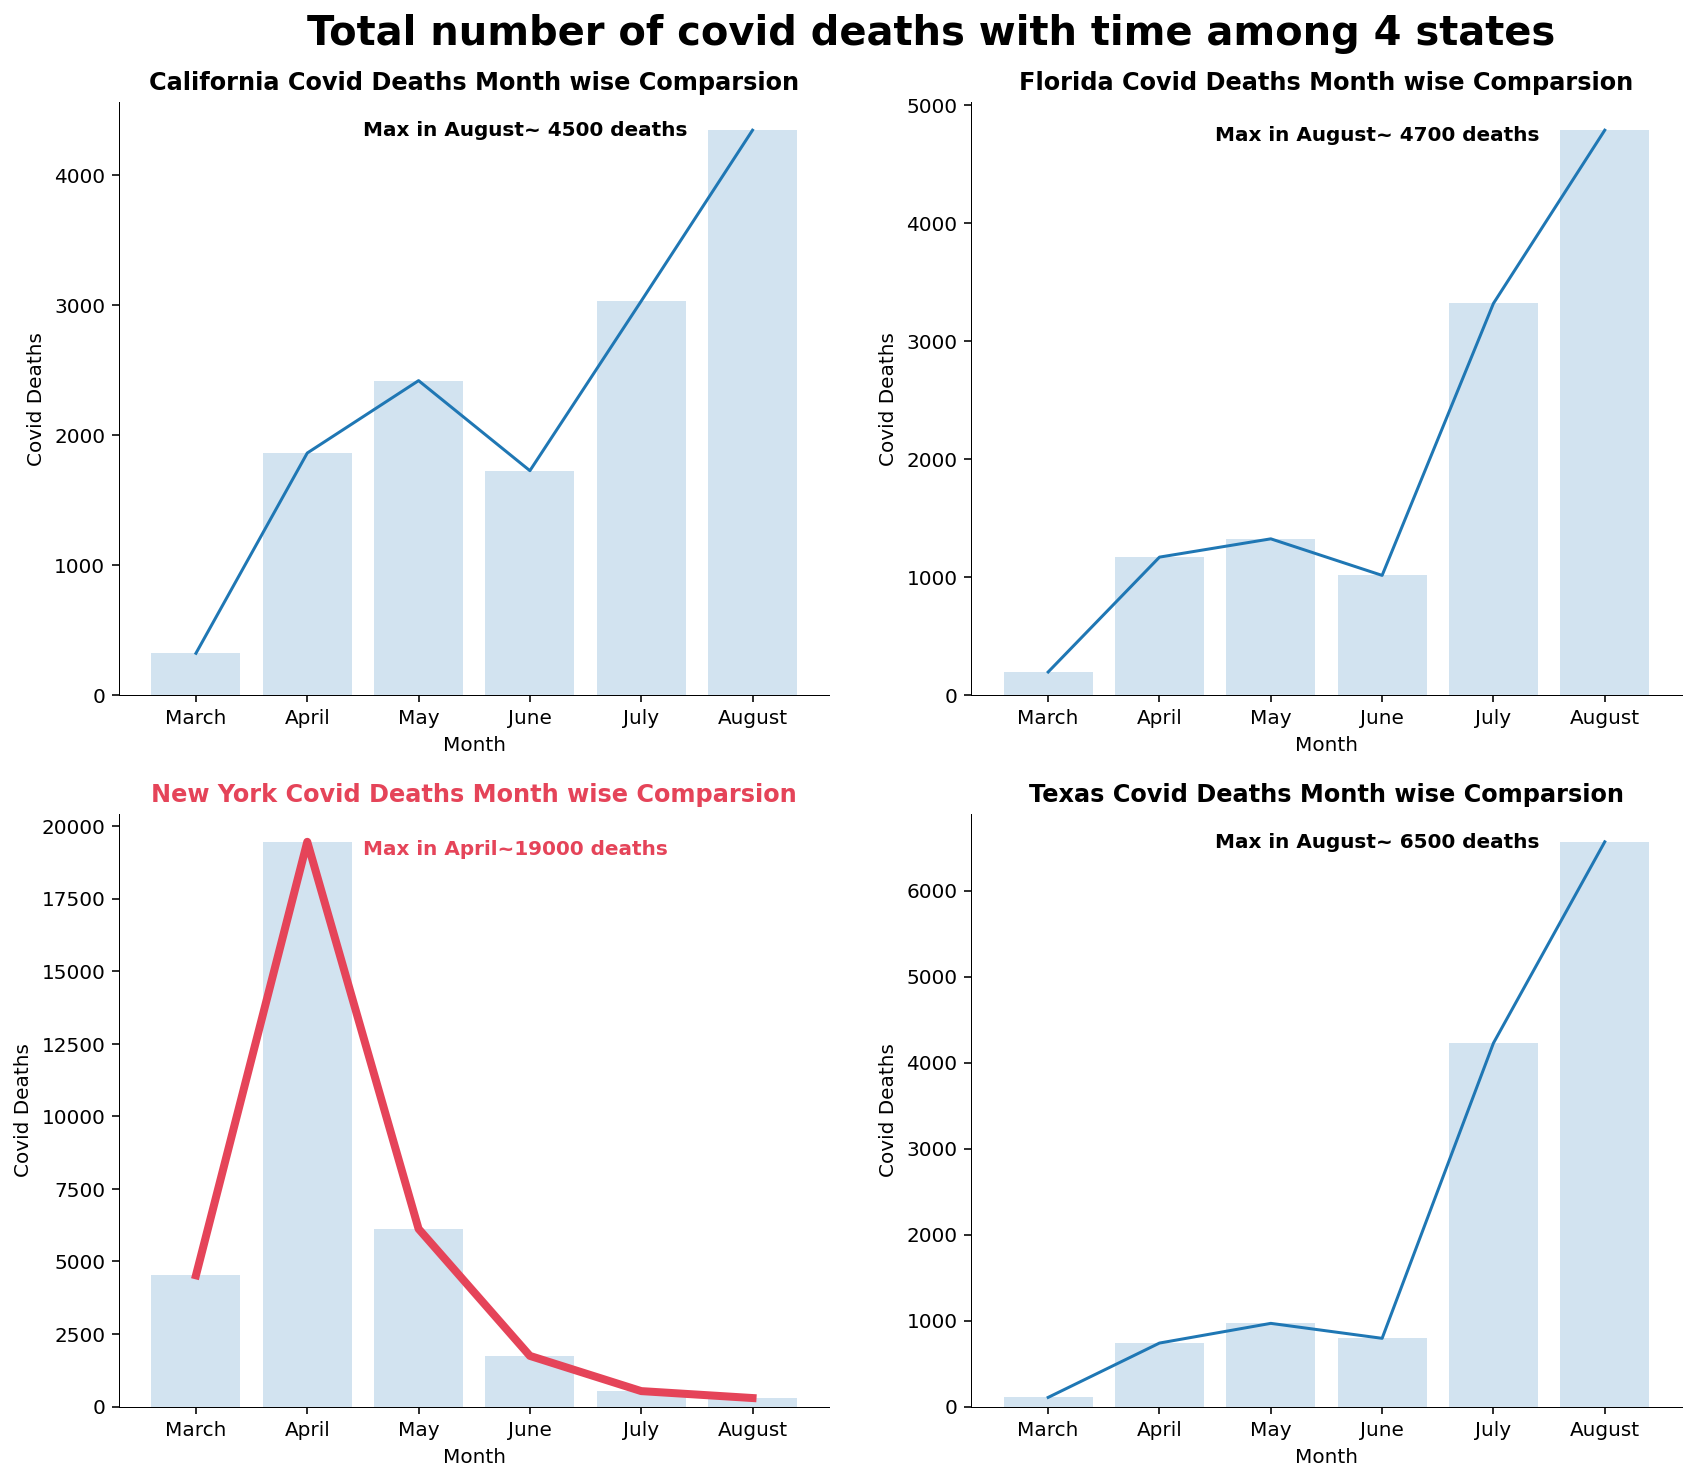

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

ax[0][0].text(4, 5000, "Total number of covid deaths with time among 4 states",weight="bold",fontsize =20)
ax[0][0].bar(ca['month'], ca['covid_deaths'], alpha=0.2)
ax[0][0].set_xlabel("Month")
ax[0][0].set_ylabel("Covid Deaths")
ax[0][0].set_title("California Covid Deaths Month wise Comparsion",weight="bold")
ax[0][0].plot(ca['month'], ca['covid_deaths'])
ax[0][0].set_xticks(ca['month'])
ax[0][0].set_xticklabels(['March','April','May','June','July','August'])
ax[0][0].text(4.5, 4300, "Max in August~ 4500 deaths",weight="bold",fontsize =10)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_linewidth(.5)
ax[0][0].spines['bottom'].set_linewidth(.5)

ax[0][1].bar(fl['month'], fl['covid_deaths'],alpha=0.2)
ax[0][1].set_xlabel("Month")
ax[0][1].set_ylabel("Covid Deaths")
ax[0][1].set_title("Florida Covid Deaths Month wise Comparsion",weight="bold")
ax[0][1].plot(fl['month'], fl['covid_deaths'])
ax[0][1].set_xticks(ca['month'])
ax[0][1].set_xticklabels(['March','April','May','June','July','August'])
ax[0][1].text(4.5, 4700, "Max in August~ 4700 deaths",weight="bold",fontsize =10)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_linewidth(.5)
ax[0][1].spines['bottom'].set_linewidth(.5)


ax[1][0].bar(ny['month'], ny['covid_deaths'],alpha=0.2)
ax[1][0].set_xlabel("Month")
ax[1][0].set_ylabel("Covid Deaths")
ax[1][0].set_title("New York Covid Deaths Month wise Comparsion", weight="bold", color="#e54459")
ax[1][0].plot(ny['month'], ny['covid_deaths'],lw=4, color="#e54459")
ax[1][0].set_xticks(ca['month'])
ax[1][0].set_xticklabels(['March','April','May','June','July','August'])
ax[1][0].text(4.5, 19000, "Max in April~19000 deaths",weight="bold",fontsize =10, color="#e54459")
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['left'].set_linewidth(.5)
ax[1][0].spines['bottom'].set_linewidth(.5)


ax[1][1].bar(tx['month'], tx['covid_deaths'],alpha=0.2)
ax[1][1].set_xlabel("Month")
ax[1][1].set_ylabel("Covid Deaths")
ax[1][1].set_title("Texas Covid Deaths Month wise Comparsion", weight="bold")
ax[1][1].plot(tx['month'], tx['covid_deaths'])
ax[1][1].set_xticks(ca['month'])
ax[1][1].set_xticklabels(['March','April','May','June','July','August'])
ax[1][1].text(4.5, 6500, "Max in August~ 6500 deaths",weight="bold",fontsize =10)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_linewidth(.5)
ax[1][1].spines['bottom'].set_linewidth(.5)